In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [2]:
# Read the file with the correct encoding
car = pd.read_csv("./car_data.csv", encoding='ISO-8859-1')
# Create a DataFrame from the results
car.head()


,brand,model,year,kilometer,engine,transmission,fuel,nb_of_doors,price
0,FIAT,Turbo 2013,2013,"48,390",135 hp 1.4L I4,5-Speed Manual,Gasoline,2 doors,"$7,787"
1,FIAT,Trekking 2014,2014,"98,119",160 hp 1.4L I4,6-Speed Automatic,Gasoline,4 doors,"$5,800"
2,FIAT,Salon Cabriolet 2013,2013,"73,482",101 hp 1.4L I4,6-Speed Automatic,Gasoline,2 doors,"$7,495"
3,FIAT,Sport 2012,2012,"73,873",101 hp 1.4L I4,6-Speed Automatic,Gasoline,2 doors,"$4,999"
4,FIAT,Sport 2013,2013,"90,056",101 hp 1.4L I4,Automatic,Gasoline,2 doors,"$5,880"


In [3]:
# info of the car
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25617 entries, 0 to 25616
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         25617 non-null  object
 1   model         25617 non-null  object
 2   year          25617 non-null  int64 
 3   kilometer     25617 non-null  object
 4   engine        25616 non-null  object
 5   transmission  25617 non-null  object
 6   fuel          25615 non-null  object
 7   nb_of_doors   25617 non-null  object
 8   price         25617 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.8+ MB


In [4]:
# remove the null values and make another variable car_cleaned
car_cleaned=car.dropna()

In [5]:
# Create a DataFrame from the results
car_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25614 entries, 0 to 25616
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         25614 non-null  object
 1   model         25614 non-null  object
 2   year          25614 non-null  int64 
 3   kilometer     25614 non-null  object
 4   engine        25614 non-null  object
 5   transmission  25614 non-null  object
 6   fuel          25614 non-null  object
 7   nb_of_doors   25614 non-null  object
 8   price         25614 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.0+ MB


In [6]:
# removed (') and $ sign from the price column and convert into int
car_cleaned['price'] = car_cleaned['price'].replace('[\$,]', '', regex=True).astype(int)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\jyoti\AppData\Local\Temp\ipykernel_32240\1875743984.py:2: SyntaxWarning: invalid escape sequence '\$'
  car_cleaned['price'] = car_cleaned['price'].replace('[\$,]', '', regex=True).astype(int)
C:\Users\jyoti\AppData\Local\Temp\ipykernel_32240\1875743984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_cleaned['price'] = car_cleaned['price'].replace('[\$,]', '', regex=True).astype(int)


In [7]:
# remove doors after the number of doors
car_cleaned['nb_of_doors'] = car_cleaned['nb_of_doors'].str.replace(r'\s*doors?', '', regex=True).str.strip()

C:\Users\jyoti\AppData\Local\Temp\ipykernel_32240\3759637215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_cleaned['nb_of_doors'] = car_cleaned['nb_of_doors'].str.replace(r'\s*doors?', '', regex=True).str.strip()


In [8]:
car_cleaned.head()

,brand,model,year,kilometer,engine,transmission,fuel,nb_of_doors,price
0,FIAT,Turbo 2013,2013,"48,390",135 hp 1.4L I4,5-Speed Manual,Gasoline,2,7787
1,FIAT,Trekking 2014,2014,"98,119",160 hp 1.4L I4,6-Speed Automatic,Gasoline,4,5800
2,FIAT,Salon Cabriolet 2013,2013,"73,482",101 hp 1.4L I4,6-Speed Automatic,Gasoline,2,7495
3,FIAT,Sport 2012,2012,"73,873",101 hp 1.4L I4,6-Speed Automatic,Gasoline,2,4999
4,FIAT,Sport 2013,2013,"90,056",101 hp 1.4L I4,Automatic,Gasoline,2,5880


In [9]:
# Convert the 'kilometer' column to string type first, then remove commas and convert to int
car_cleaned['kilometer'] = car_cleaned['kilometer'].astype(str).str.replace(',', '').astype(int)

# Convert kilometers to miles
car_cleaned['miles'] = car_cleaned['kilometer'] * 0.621371

# Optionally round miles to the nearest integer
car_cleaned['miles'] = car_cleaned['miles'].round().astype(int)

car_cleaned.head()


C:\Users\jyoti\AppData\Local\Temp\ipykernel_32240\3435682796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_cleaned['kilometer'] = car_cleaned['kilometer'].astype(str).str.replace(',', '').astype(int)
C:\Users\jyoti\AppData\Local\Temp\ipykernel_32240\3435682796.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_cleaned['miles'] = car_cleaned['kilometer'] * 0.621371
C:\Users\jyoti\AppData\Local\Temp\ipykernel_32240\3435682796.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,brand,model,year,kilometer,engine,transmission,fuel,nb_of_doors,price,miles
0,FIAT,Turbo 2013,2013,48390,135 hp 1.4L I4,5-Speed Manual,Gasoline,2,7787,30068
1,FIAT,Trekking 2014,2014,98119,160 hp 1.4L I4,6-Speed Automatic,Gasoline,4,5800,60968
2,FIAT,Salon Cabriolet 2013,2013,73482,101 hp 1.4L I4,6-Speed Automatic,Gasoline,2,7495,45660
3,FIAT,Sport 2012,2012,73873,101 hp 1.4L I4,6-Speed Automatic,Gasoline,2,4999,45903
4,FIAT,Sport 2013,2013,90056,101 hp 1.4L I4,Automatic,Gasoline,2,5880,55958


In [10]:
car_cleaned.drop(columns=['kilometer'], inplace=True)

C:\Users\jyoti\AppData\Local\Temp\ipykernel_32240\239182998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_cleaned.drop(columns=['kilometer'], inplace=True)


In [11]:
car_cleaned.head()

,brand,model,year,engine,transmission,fuel,nb_of_doors,price,miles
0,FIAT,Turbo 2013,2013,135 hp 1.4L I4,5-Speed Manual,Gasoline,2,7787,30068
1,FIAT,Trekking 2014,2014,160 hp 1.4L I4,6-Speed Automatic,Gasoline,4,5800,60968
2,FIAT,Salon Cabriolet 2013,2013,101 hp 1.4L I4,6-Speed Automatic,Gasoline,2,7495,45660
3,FIAT,Sport 2012,2012,101 hp 1.4L I4,6-Speed Automatic,Gasoline,2,4999,45903
4,FIAT,Sport 2013,2013,101 hp 1.4L I4,Automatic,Gasoline,2,5880,55958


In [12]:
#  to get all the unique values of the columns
# Loop through each column and print unique values
for col in car_cleaned.columns:
    print('unique values of '+col)
    print(car_cleaned[col].unique())
    print('----------------------------------')

unique values of brand
['FIAT' 'Dodge' 'Mercedes-Benz' 'Mitsubishi' 'Tesla' 'Cadillac' 'Nissan'
 'Peugeot' 'Renault' 'Volkswagen' 'Kia' 'Honda' 'Suzuki' 'Citroen' 'Jeep'
 'Chevrolet' 'Subaru' 'Audi' 'Hyundai' 'BMW' 'Toyota']
----------------------------------
unique values of model
['Turbo 2013' 'Trekking 2014' 'Salon Cabriolet 2013' ...
 'Tacoma Double Cab SB' 'Tacoma Access Cab V6 SR5 4WD'
 'Highlander SE V6 4WD']
----------------------------------
unique values of year
[2013 2014 2012 2016 2015 2018 2017 2019 2020 2021 2022 1981 2004 2005
 2007 2010 2002 1997 2011 2006 2008 2009 2023 2003 2001 1995 2024 1987
 1998 1990 2000 1999]
----------------------------------
unique values of engine
['135 hp 1.4L I4' '160 hp 1.4L I4' '101 hp 1.4L I4' '180 hp 2.4L I4'
 '164 hp 1.4L I4' '177 hp 1.3L I4' '102 hp 2L I4' '173 hp 2.4L I4'
 '172 hp 2.4L I4' '305 hp 5.9L I6 Diesel' '500 hp 8.3L V10'
 '325 hp 5.9L I6 Diesel' '250 hp 3.5L V6' '245 hp 5.9L V8'
 '210 hp 3.7L V6' '175 hp 3.9L V6' '345 hp 5.

In [13]:
# Remove rows where 'engine' column has NaN values
car_cleaned = car_cleaned.dropna(subset=['engine'])


In [14]:
# Extract horsepower number before 'hp'
car_cleaned['engine(hp)'] = car_cleaned['engine'].str.extract(r'(\d+)\s*hp')[0]

# Drop rows where horsepower couldn't be extracted
car_cleaned = car_cleaned[car_cleaned['engine(hp)'].notna()]

# Convert to integer safely
car_cleaned['engine(hp)'] = car_cleaned['engine(hp)'].astype(int)


In [15]:
# drop the column engine
car_cleaned.drop(columns=['engine'], inplace=True)
car_cleaned.head()

,brand,model,year,transmission,fuel,nb_of_doors,price,miles,engine(hp)
0,FIAT,Turbo 2013,2013,5-Speed Manual,Gasoline,2,7787,30068,135
1,FIAT,Trekking 2014,2014,6-Speed Automatic,Gasoline,4,5800,60968,160
2,FIAT,Salon Cabriolet 2013,2013,6-Speed Automatic,Gasoline,2,7495,45660,101
3,FIAT,Sport 2012,2012,6-Speed Automatic,Gasoline,2,4999,45903,101
4,FIAT,Sport 2013,2013,Automatic,Gasoline,2,5880,55958,101


In [16]:
# Convert transmission values to 'Manual' or 'Automatic'
car_cleaned['transmission'] = car_cleaned['transmission'].apply(
    lambda x: 'Manual' if 'Manual' in str(x) else ('Automatic' if 'Automatic' in str(x) else 'Unknown')
)

# Print the updated DataFrame
car_cleaned


,brand,model,year,transmission,fuel,nb_of_doors,price,miles,engine(hp)
0,FIAT,Turbo 2013,2013,Manual,Gasoline,2,7787,30068,135
1,FIAT,Trekking 2014,2014,Automatic,Gasoline,4,5800,60968,160
2,FIAT,Salon Cabriolet 2013,2013,Automatic,Gasoline,2,7495,45660,101
3,FIAT,Sport 2012,2012,Automatic,Gasoline,2,4999,45903,101
4,FIAT,Sport 2013,2013,Automatic,Gasoline,2,5880,55958,101
...,...,...,...,...,...,...,...,...,...
25611,Toyota,Tacoma Access Cab V6 SR5 4WD,2016,Automatic,Gasoline,4,23750,70014,278
25612,Toyota,Sequoia Platinum,2014,Automatic,Gasoline,4,23998,74479,381
25614,Toyota,Highlander SE V6 4WD,2011,Automatic,Gasoline,4,12559,84835,187
25615,Toyota,Tacoma TRD Sport Double Cab RWD,2022,Automatic,Gasoline,4,34000,26780,278


In [17]:
# Remove rows where 'fuel' contains 'Not Rated' or starts with a digit
car_cleaned = car_cleaned[~car_cleaned['fuel'].str.contains(r'Not Rated|^\d', na=False)]

# Print the cleaned DataFrame
car_cleaned

,brand,model,year,transmission,fuel,nb_of_doors,price,miles,engine(hp)
0,FIAT,Turbo 2013,2013,Manual,Gasoline,2,7787,30068,135
1,FIAT,Trekking 2014,2014,Automatic,Gasoline,4,5800,60968,160
2,FIAT,Salon Cabriolet 2013,2013,Automatic,Gasoline,2,7495,45660,101
3,FIAT,Sport 2012,2012,Automatic,Gasoline,2,4999,45903,101
4,FIAT,Sport 2013,2013,Automatic,Gasoline,2,5880,55958,101
...,...,...,...,...,...,...,...,...,...
25611,Toyota,Tacoma Access Cab V6 SR5 4WD,2016,Automatic,Gasoline,4,23750,70014,278
25612,Toyota,Sequoia Platinum,2014,Automatic,Gasoline,4,23998,74479,381
25614,Toyota,Highlander SE V6 4WD,2011,Automatic,Gasoline,4,12559,84835,187
25615,Toyota,Tacoma TRD Sport Double Cab RWD,2022,Automatic,Gasoline,4,34000,26780,278


In [18]:
# Define a function to calculate outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Check for outliers in each column
outliers_year = detect_outliers(car_cleaned, 'year')
outliers_price = detect_outliers(car_cleaned, 'price')
outliers_miles = detect_outliers(car_cleaned, 'miles')
outliers_engine_hp = detect_outliers(car_cleaned, 'engine(hp)')

# Print outliers count for each column
print("Outliers in 'year' column:", outliers_year.shape[0])
print("Outliers in 'price' column:", outliers_price.shape[0])
print("Outliers in 'miles' column:", outliers_miles.shape[0])
print("Outliers in 'engine(hp)' column:", outliers_engine_hp.shape[0])

Outliers in 'year' column: 127
Outliers in 'price' column: 311
Outliers in 'miles' column: 60
Outliers in 'engine(hp)' column: 181


In [19]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
# Remove outliers from each column
car_cleaned_no_outliers_year = remove_outliers(car_cleaned, 'year')
car_cleaned_no_outliers_price = remove_outliers(car_cleaned_no_outliers_year, 'price')
car_cleaned_no_outliers_miles = remove_outliers(car_cleaned_no_outliers_price, 'miles')
car_cleaned1 = remove_outliers(car_cleaned_no_outliers_miles, 'engine(hp)')

In [20]:
# Print the shape of the data after removing outliers
car_cleaned1.shape

(16812, 9)

In [21]:
# replace the fuel type with diesel;
car_cleaned1['fuel'] = car_cleaned1['fuel'].replace(['Flex Fuel Vehicle','Black', 'Brown', 'Gray','Leather','Automatic','Continuously Variable Transmission'], 'Diesel')

C:\Users\jyoti\AppData\Local\Temp\ipykernel_32240\2310700555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_cleaned1['fuel'] = car_cleaned1['fuel'].replace(['Flex Fuel Vehicle','Black', 'Brown', 'Gray','Leather','Automatic','Continuously Variable Transmission'], 'Diesel')


In [22]:
# car runs on diesel
Diesel_cars = car_cleaned1[car_cleaned1['fuel'] == 'Diesel']
Diesel_cars

,brand,model,year,transmission,fuel,nb_of_doors,price,miles,engine(hp)
816,Dodge,RAM 2500 SLT Quad Cab 4WD,2007,Automatic,Diesel,4,18898,108823,325
865,Dodge,Grand Caravan American Value Package FWD,2016,Automatic,Diesel,4,5700,82207,283
866,Dodge,Grand Caravan SE FWD,2016,Automatic,Diesel,4,15995,24265,283
867,Dodge,Journey SXT FWD,2017,Automatic,Diesel,4,6888,82862,283
868,Dodge,Grand Caravan SE Plus FWD,2019,Automatic,Diesel,4,11995,68243,283
...,...,...,...,...,...,...,...,...,...
25273,Toyota,Tundra SR5 CrewMax 5.7L FFV 4WD,2014,Automatic,Diesel,4,17407,118999,381
25298,Toyota,Tacoma TRD Sport Double Cab 4WD,2022,Manual,Diesel,4,39999,5832,278
25341,Toyota,Tundra SR5 CrewMax 5.7L FFV 4WD,2018,Automatic,Diesel,4,23674,102167,381
25390,Toyota,Tundra SR5 CrewMax 5.7L FFV 4WD,2014,Automatic,Diesel,4,24900,69752,381


In [23]:
# cars that are gasoline
gasoline_cars = car_cleaned[car_cleaned['fuel'] == 'Gasoline']
gasoline_cars

,brand,model,year,transmission,fuel,nb_of_doors,price,miles,engine(hp)
0,FIAT,Turbo 2013,2013,Manual,Gasoline,2,7787,30068,135
1,FIAT,Trekking 2014,2014,Automatic,Gasoline,4,5800,60968,160
2,FIAT,Salon Cabriolet 2013,2013,Automatic,Gasoline,2,7495,45660,101
3,FIAT,Sport 2012,2012,Automatic,Gasoline,2,4999,45903,101
4,FIAT,Sport 2013,2013,Automatic,Gasoline,2,5880,55958,101
...,...,...,...,...,...,...,...,...,...
25611,Toyota,Tacoma Access Cab V6 SR5 4WD,2016,Automatic,Gasoline,4,23750,70014,278
25612,Toyota,Sequoia Platinum,2014,Automatic,Gasoline,4,23998,74479,381
25614,Toyota,Highlander SE V6 4WD,2011,Automatic,Gasoline,4,12559,84835,187
25615,Toyota,Tacoma TRD Sport Double Cab RWD,2022,Automatic,Gasoline,4,34000,26780,278


In [24]:
# replace the unknown transmission with manual
car_cleaned1['transmission'] = car_cleaned1['transmission'].replace('Unknown', 'Manual')
car_cleaned1['transmission'].unique()

C:\Users\jyoti\AppData\Local\Temp\ipykernel_32240\159823925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_cleaned1['transmission'] = car_cleaned1['transmission'].replace('Unknown', 'Manual')


array(['Manual', 'Automatic'], dtype=object)

In [25]:
# Save the cleaned DataFrame as a CSV file
car_cleaned1.to_csv('old_car_data.csv', index=False)

"CSV file saved as 'old_car_data.csv'"

"CSV file saved as 'old_car_data.csv'"

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

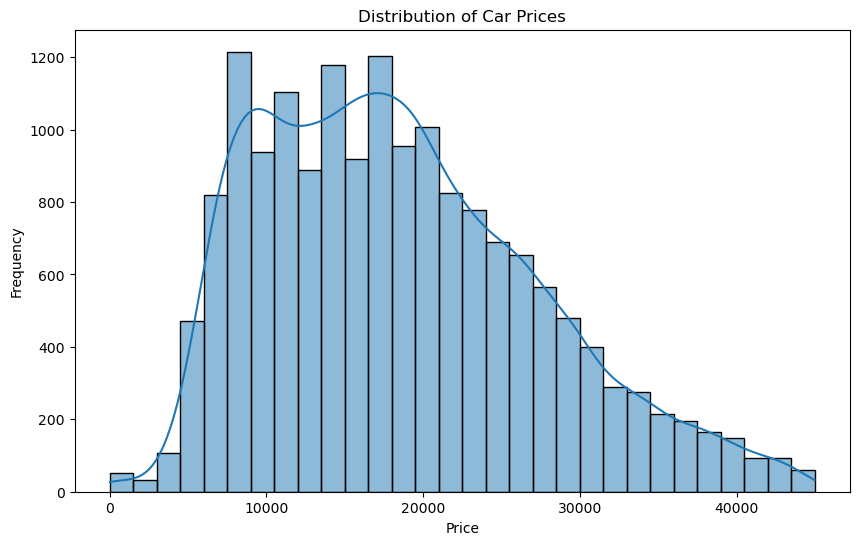

In [27]:
# plot after filtering
plt.figure(figsize=(10,6))
sns.histplot(car_cleaned1['price'],bins=30,kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.show()

The bars show how many cars fall into each price range (divided into 30 bins).

The height of each bar indicates the frequency (number of cars) within that price range.
The smooth curve overlaid on the histogram is the Kernel Density Estimate, which approximates the probability density function of car prices.

It gives a smoothed version of the distribution, making it easier to spot patterns or multiple peaks (modes).
his plot helps you understand if car prices are:

Normally distributed, skewed left/right, or bimodal.

Clustered in certain ranges (e.g., many cars priced around $10,000–$15,000).

Containing outliers (e.g., very expensive or very cheap cars far from the rest).


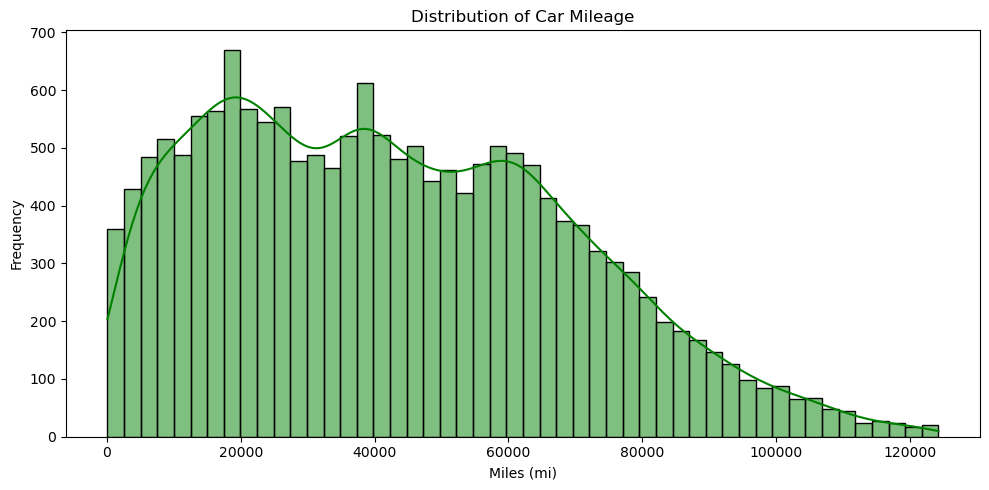

In [28]:
#  histogram with KDE for the "milage"
plt.figure(figsize=(10, 5))
sns.histplot(car_cleaned1['miles'], bins=50, kde=True, color='green')
plt.title("Distribution of Car Mileage")
plt.xlabel("Miles (mi)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


Histogram (green bars): Shows how many cars fall into each mileage range (split into 50 bins).

KDE curve (green line): A smooth estimate of the underlying mileage distribution.

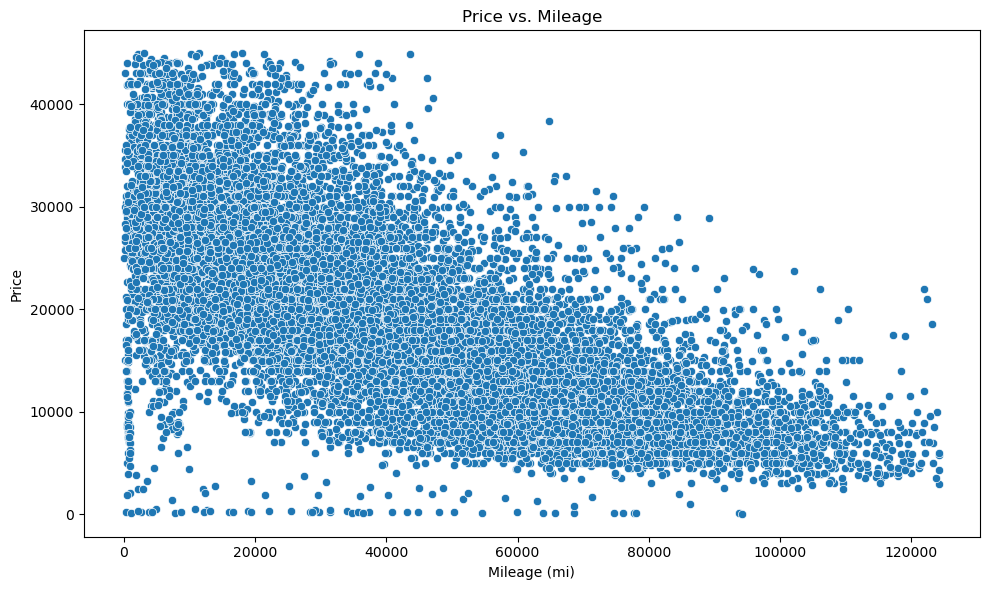

In [29]:
# scatter plot showing the relationship between car mileage and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='miles', y='price', data=car_cleaned1)
plt.title("Price vs. Mileage")
plt.xlabel("Mileage (mi)")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


downward trend, it suggests that higher mileage tends to be associated with lower prices

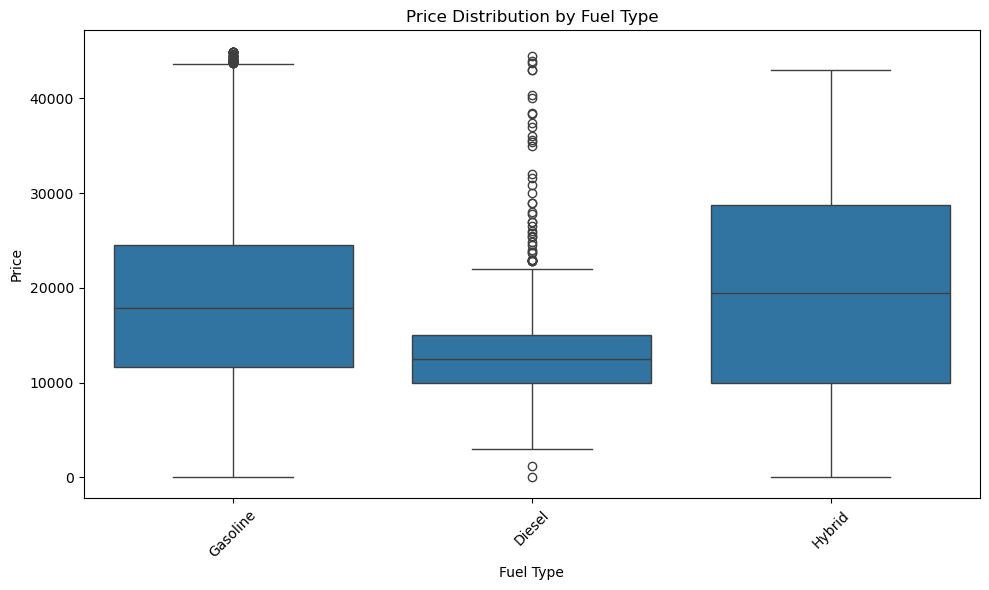

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='price', data=car_cleaned1)
plt.title("Price Distribution by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hybrid and gasoline has the highest or lowest median price.
hybrid one has the widest price spread .
Electric or Hybrid cars have higher median prices, while Petrol or Diesel are lower



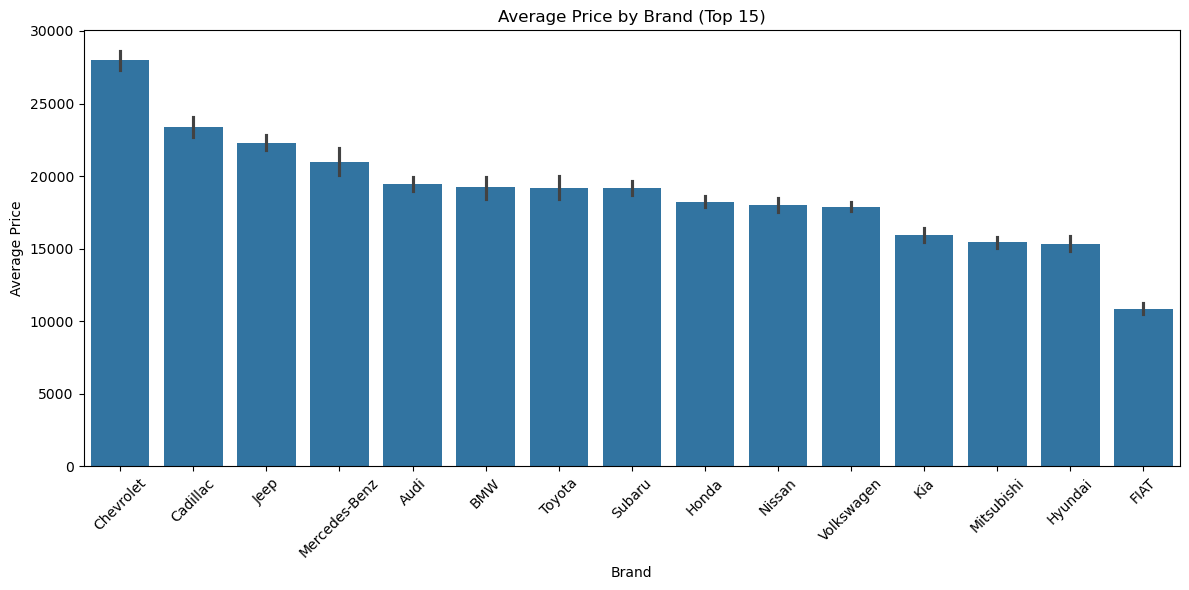

In [31]:
# Get top 15 brands by count
top_brands = car_cleaned1['brand'].value_counts().nlargest(15).index
df_top_brands = car_cleaned1[car_cleaned1['brand'].isin(top_brands)]

# Compute order of brands by average price (descending)
brand_order = df_top_brands.groupby('brand')['price'].mean().sort_values(ascending=False).index

# Plot the sorted barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='price', data=df_top_brands, estimator=np.mean, order=brand_order)
plt.title("Average Price by Brand (Top 15)")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Brands on the left are generally higher-end/luxury .

Brands on the right tend to be more affordable/economy Market Segmentation:

Helps you compare how car brands are priced relative to each other.

Can inform resale value expectations or consumer purchasing trends.

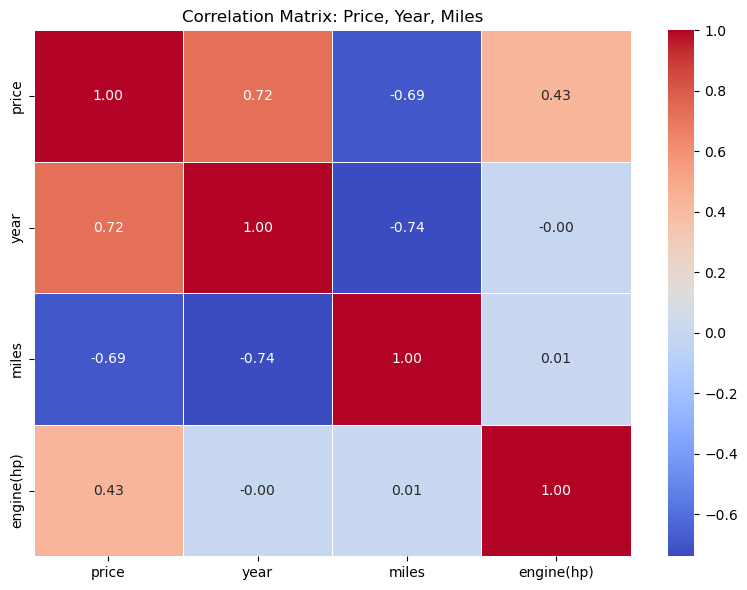

In [32]:
# Select only the relevant columns: price, year, miles
selected_cols = car_cleaned1[['price', 'year', 'miles','engine(hp)']]

# Compute the correlation matrix
corr = selected_cols.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Price, Year, Miles")
plt.tight_layout()
plt.show()

Key Correlations to Look For:

Price vs. Year:

Typically, we expect a positive correlation. Newer cars tend to have higher prices.

If the correlation is strong and positive, this suggests that newer cars generally have higher prices, which aligns with market trends.

*Price vs. Miles:

We usually expect a negative correlation. Cars with higher mileage tend to have lower prices, as more wear and tear typically reduces their value.

A strong negative correlation would confirm that higher mileage leads to lower prices, while a weak correlation might suggest that other factors (like brand or condition) play a more significant role.


A strong positive correlation means cars with larger engines (e.g., sports cars or luxury models) tend to have higher prices.

*Year vs. Miles:

Negative correlation expected: Older cars generally have higher mileage, and this would show in a moderate to strong negative correlation.

If it's weak or near zero, it may suggest that the dataset includes both high-mileage and low-mileage cars for various years, indicating no strict relationship.

*Price vs Engine
Positive Correlation: In most car datasets, engine size and price are positively correlated — meaning that as engine size increases, the price tends to increase too.

This is because larger engines often provide more power and performance, which are usually found in higher-end or luxury vehicles.


# Model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [34]:
# drop the column model
df = car_cleaned1.drop(columns=['model'])


In [35]:
# read the dataframe
df

,brand,year,transmission,fuel,nb_of_doors,price,miles,engine(hp)
0,FIAT,2013,Manual,Gasoline,2,7787,30068,135
1,FIAT,2014,Automatic,Gasoline,4,5800,60968,160
2,FIAT,2013,Automatic,Gasoline,2,7495,45660,101
3,FIAT,2012,Automatic,Gasoline,2,4999,45903,101
4,FIAT,2013,Automatic,Gasoline,2,5880,55958,101
...,...,...,...,...,...,...,...,...
25611,Toyota,2016,Automatic,Gasoline,4,23750,70014,278
25612,Toyota,2014,Automatic,Gasoline,4,23998,74479,381
25614,Toyota,2011,Automatic,Gasoline,4,12559,84835,187
25615,Toyota,2022,Automatic,Gasoline,4,34000,26780,278


In [36]:
# convert nb_of_doors into int
df['nb_of_doors'] = df['nb_of_doors'].astype(int)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16812 entries, 0 to 25616
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         16812 non-null  object
 1   year          16812 non-null  int64 
 2   transmission  16812 non-null  object
 3   fuel          16812 non-null  object
 4   nb_of_doors   16812 non-null  int32 
 5   price         16812 non-null  int32 
 6   miles         16812 non-null  int32 
 7   engine(hp)    16812 non-null  int32 
dtypes: int32(4), int64(1), object(3)
memory usage: 919.4+ KB


In [38]:
# Define features and target variable
# Features: all columns except 'price'
X=df.drop(columns=['price'])
y=df['price']

In [39]:
# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# using OneHotEncoder for categorical variables
# Initialize OneHotEncoder

def encoder(df):
    # Columns to encode
    cols_to_encode = ['brand','transmission', 'fuel']
    # Initialize OneHotEncoder
    ohe = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')

    # Fit and transform the selected columns
    encoded_array = ohe.fit_transform(df[cols_to_encode])
    # Convert to DataFrame with proper column names
    encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(cols_to_encode), index=df.index)
    # Drop original categorical columns
    df = df.drop(columns=cols_to_encode)
    # Concatenate the encoded DataFrame back to the original DataFrame
    df = pd.concat([df, encoded_df], axis=1)
    return df,ohe

In [41]:
# Define features and target variable
X_train_encoded,fitted_ohe_train = encoder(X_train)
X_test_encoded,fitted_ohe_test = encoder(X_test)

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create a Random Forest Regressor model
model_rfr = RandomForestRegressor(random_state=42)



In [43]:
# Step 5: Fit and evaluate
model_rfr=model_rfr.fit(X_train_encoded, y_train)
y_pred = model_rfr.predict(X_test_encoded)

In [44]:

# Evaluate the model
score = model_rfr.score(X_test_encoded, y_test)
print(score)

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

0.8826510141644225
R² Score: 0.8826510141644225


This means that 88.27% of the variance in the target variable is explained by the features in your model.

An R² above 0.85 generally indicates a strong fit, especially in regression tasks involving real-world, noisy data like car prices, housing values, etc.

However, it’s not perfect (1.0 is the max), so there’s still room to reduce error.

In [45]:
# getting root mean square error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [46]:
# print RMSE
print("RMSE Score:", rmse)

RMSE Score: 3045.553907485291


RMSE gives you a direct idea of the average prediction error in units of your target variable (e.g., dollars if you're predicting prices).

An RMSE of ~3045 means that, on average, your predictions are off by around 3045 units.

Whether this is good or not depends on the range of your target values:

If prices range from $10,000 to $50,000, then 3045 is a reasonable error (~6–30%).

If the range is narrow (e.g., $5,000 to $10,000), then this is too high.



In [47]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)


MAE: 1927.1631407969076


If you're predicting car prices, a MAE of ~$1,927 might mean your model is, on average, off by about $1,900, which is acceptable depending on the total price range.
However, some predictions might be off by more than $3,000 (RMSE reflects this).


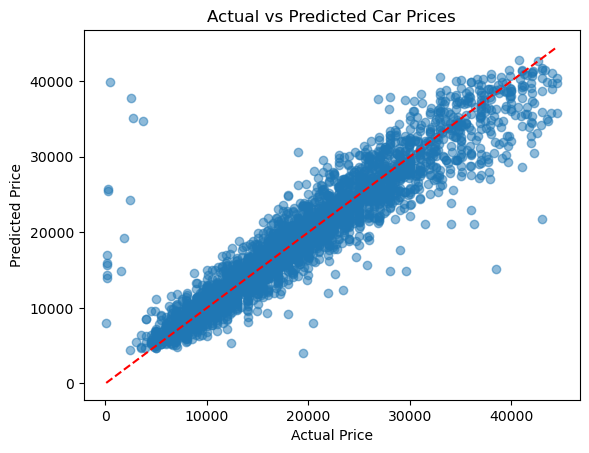

In [48]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.show()


In [49]:
# Get feature importances and feature names
importances = model_rfr.feature_importances_
feature_names = X_train_encoded.columns

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance (descending)
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(5)

print(importance_df)


          Feature  Importance
0            year    0.507267
3      engine(hp)    0.269083
2           miles    0.160365
18   brand_Toyota    0.008322
11  brand_Hyundai    0.006095


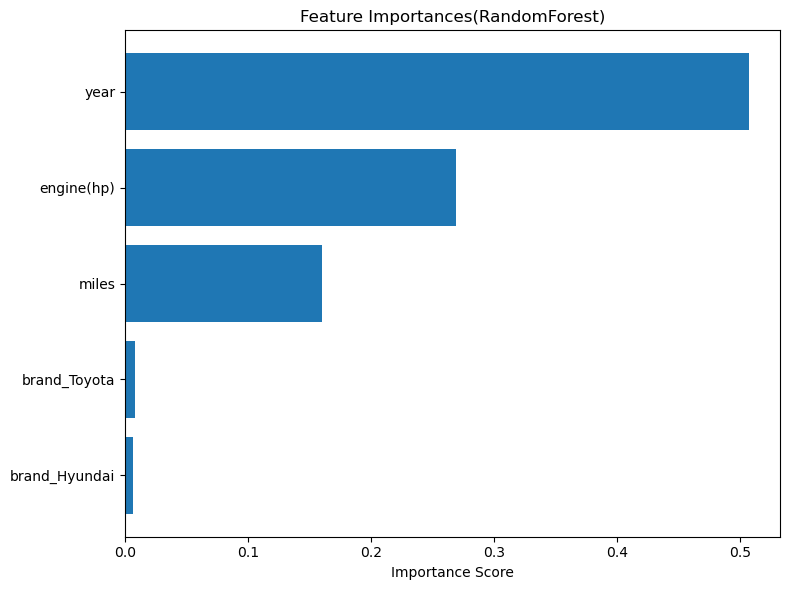

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importances(RandomForest)')
plt.gca().invert_yaxis()  # highest importance at the top
plt.tight_layout()
plt.show()


year and engines are the strongest predictors, likely because they directly affect depreciation and performance.

Brand features like brand_toyota and brand_hyundai highlight how make affects price, especially for popular or reliable brands.

In [51]:
import xgboost as xgb

In [52]:
# get information about the data
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13449 entries, 184 to 24176
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    13449 non-null  int64  
 1   nb_of_doors             13449 non-null  int32  
 2   miles                   13449 non-null  int32  
 3   engine(hp)              13449 non-null  int32  
 4   brand_Audi              13449 non-null  float64
 5   brand_BMW               13449 non-null  float64
 6   brand_Cadillac          13449 non-null  float64
 7   brand_Chevrolet         13449 non-null  float64
 8   brand_Dodge             13449 non-null  float64
 9   brand_FIAT              13449 non-null  float64
 10  brand_Honda             13449 non-null  float64
 11  brand_Hyundai           13449 non-null  float64
 12  brand_Jeep              13449 non-null  float64
 13  brand_Kia               13449 non-null  float64
 14  brand_Mercedes-Benz     13449 non-null  f

In [53]:
# import xgboost
from xgboost import XGBRegressor

# Create an XGBoost Regressor model
model_xgb = XGBRegressor()

# Step 5: Fit and evaluate
# Fit the model
model_xgb=model_xgb.fit(X_train_encoded, y_train)

# Predict on the test set
y_pred_xgb = model_xgb.predict(X_test_encoded)


In [54]:

#  Evaluate the model
# getting root mean square error
score=model_xgb.score(X_test_encoded,y_test)
print(score)
r2 = r2_score(y_test, y_pred_xgb)
print("R² Score:", r2)

0.8978592753410339
R² Score: 0.8978592753410339


In [55]:

# MAE
mae = mean_absolute_error(y_test, y_pred_xgb)
print(f"MAE: {mae}")

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"RMSE: {rmse}")

# R²
r2 = r2_score(y_test, y_pred_xgb)
print(f"R²: {r2}")


MAE: 1819.8986846170644
RMSE: 2841.3591111886844
R²: 0.8978592753410339


--Model Performance Comparison


Metric	Random Forest	XGBoost	Improvement
MAE (Mean Absolute Error)	1927.16	1819.90 ✅	~5.6% lower
RMSE (Root Mean Squared Error)	3045.55	2841.36 ✅	~6.7% lower
R² Score	0.8827	0.8979 ✅	~1.5% higher

* Interpretation
XGBoost outperforms Random Forest on all key metrics:

Lower MAE and RMSE suggest more accurate and consistent predictions.

Higher R² Score indicates a better fit to the data, explaining more variance.

The improvements, while modest, are consistent — this makes XGBoost a strong candidate as your final model.

* Recommendation
Since XGBoost gives:

Lower prediction error (MAE, RMSE)

Higher predictive power (R²)



<Figure size 1000x600 with 0 Axes>

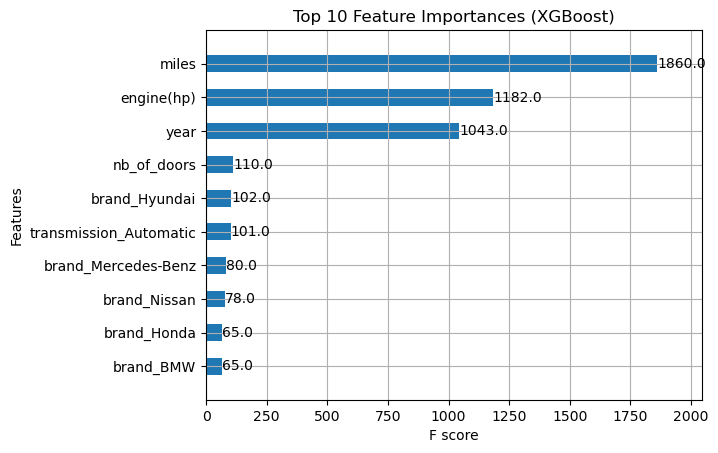

In [56]:
from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(model_xgb, max_num_features=10, importance_type='weight', height=0.5). set_title('Feature Importance (XGBoost)')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.show()


In [57]:
# prediction by the model and using different values
# Example input

example=['FIAT',	2013,	'Manual',	'Gasoline',	2,	30068,	135]
#transform example to a dataframe
df_example = pd.DataFrame([example], columns=['brand',	'year',	'transmission',	'fuel',	'nb_of_doors',	'miles',	'engine(hp)'])

In [58]:
df_example

,brand,year,transmission,fuel,nb_of_doors,miles,engine(hp)
0,FIAT,2013,Manual,Gasoline,2,30068,135


In [59]:
# Select only the columns OneHotEncoder expects
df_example_to_encode = df_example[['brand', 'transmission', 'fuel']]
# Transform using the fitted encoder
df_example_encoded = fitted_ohe_test.transform(df_example_to_encode)
# Create DataFrame for encoded columns
encoded_df = pd.DataFrame(df_example_encoded, columns=fitted_ohe_test.get_feature_names_out())

In [60]:
# Select numeric columns
df_example_numeric = df_example[['year', 'nb_of_doors', 'miles', 'engine(hp)']]
# Concatenate numeric + encoded features
df_final_input = pd.concat([df_example_numeric.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

In [61]:
# predicting price using the XGB model
# Make prediction
prediction = model_xgb.predict(df_final_input)

In [62]:
print(prediction)

[9783.422]


In [63]:
# predictions using the RandomForestRegressor
# Make prediction using the RandomForestRegressor model
prediction = model_rfr.predict(df_final_input)

In [64]:
print(prediction)

[9325.87]


conclusion


XGBoost Prediction: $9,783.42

Random Forest Prediction: $9,325.87

Here’s a concise and presentable Markdown summary and comparison of the predictions:

**Price Prediction Comparison
Model	Predicted Price
* XGBoost Regressor	$9,783.42
* Random Forest Regressor	$9,325.87

* Interpretation:
XGBoost predicts a slightly higher value (~$457.55 more) than Random Forest for the same input.

Since XGBoost has lower MAE, RMSE, and higher R², it is statistically more reliable.

The small difference indicates that both models are generally in agreement, which adds confidence.

* Recommendation:
Use the XGBoost prediction ($9,783.42) as your final price estimate, especially if you've already validated it as the better-performing model on your test data.

In [65]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
import gradio as gr

In [67]:
X_train.brand.unique()

array(['FIAT', 'Hyundai', 'Cadillac', 'Volkswagen', 'Nissan', 'Toyota',
       'Subaru', 'Kia', 'BMW', 'Honda', 'Mitsubishi', 'Dodge',
       'Mercedes-Benz', 'Audi', 'Jeep', 'Chevrolet'], dtype=object)

In [68]:
X_train.fuel.unique()

array(['Gasoline', 'Hybrid', 'Diesel'], dtype=object)

In [69]:
# Gradio prediction function
def predict_price(brand, year, transmission, fuel, nb_of_doors, miles, engine_hp):
    # Step 1: Create DataFrame from user input
    input_data = pd.DataFrame([{
        'brand': brand,
        'year': year,
        'transmission': transmission,
        'fuel': fuel,
        'nb_of_doors': nb_of_doors,
        'miles': miles,
        'engine(hp)': engine_hp
    }])
    # Step 2: OneHotEncode categorical features
    categorical_data = input_data[['brand', 'transmission', 'fuel']]
    encoded_cats = fitted_ohe_test.transform(categorical_data)
    encoded_df = pd.DataFrame(encoded_cats, columns=fitted_ohe_test.get_feature_names_out())
    # Step 3: Prepare numeric features
    numeric_data = input_data[['year', 'nb_of_doors', 'miles', 'engine(hp)']]
    # Step 4: Combine numeric and encoded features
    final_input = pd.concat([numeric_data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
    # Step 5: Predict using the trained model
    predicted_price = model_xgb.predict(final_input)
    # Step 6: Return formatted result
    return f"Predicted Price: ${predicted_price[0]:,.2f}"


In [70]:
# Gradio Interface
iface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Dropdown(['FIAT', 'Hyundai', 'Cadillac', 'Volkswagen', 'Nissan', 'Toyota',
    'Subaru', 'Kia', 'BMW', 'Honda', 'Mitsubishi', 'Dodge',
    'Mercedes-Benz', 'Audi', 'Jeep', 'Chevrolet'], label="Brand"),
        gr.Number(label="Year"),
        gr.Dropdown(['Manual', 'Automatic'], label="Transmission"),
        gr.Dropdown(['Gasoline', 'Hybrid', 'Diesel'], label="Fuel Type"),
        gr.Number(label="Number of Doors"),
        gr.Number(label="Mileage (miles)"),
        gr.Number(label="Engine Horsepower")
    ],
    outputs="text",
    title="Car Price Prediction"
)
iface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://fc7774d53643feda01.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [71]:
# gr.Interface(fn=cars, inputs="textbox", outputs="textbox").launch()